# Using Decision Trees to Diagnose Breast Cancer

Now that we have built our first decision trees, it's time to turn our attention to a real dataset: The Breast Cancer Wisconsin dataset <https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)>.

In order to make the take feasible, the researchers performed feature extraction on the images, like we did in Chapter 4, Representing Data and Engineering Features. They went through a total of 569 images, and extracted 30 different features that describe the characteristics of the cell nuclei present in the images, including:

- cell nucleus texture (represented by the standard deviation of the gray-scale values)

- cell nucleus size (calculated as the mean of distances from center to points on the perimeter)

- tissue smoothness (local variation in radius lengths)

- tissue compactness

The goal of the research was then to classify tissue samples into benign and malignant (a binary classification task).

## Loading the dataset

The full dataset is part of Scikit-Learn's example datasets:

In [2]:
from sklearn import datasets
import pandas as pd

data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [27]:
df.shape

(569, 31)

With a look at the provided feature names, we recognize some that we mentioned above:

In [3]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [29]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


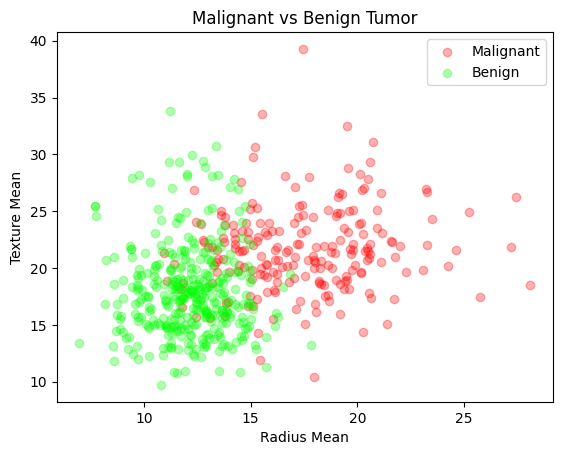

In [4]:
import matplotlib.pyplot as plt
M = df[df.target == 0]
B = df[df.target == 1]
plt.title("Malignant vs Benign Tumor")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.scatter(M['mean radius'], M['mean texture'], color = "red", label = "Malignant", alpha = 0.3)
plt.scatter(B['mean radius'], B['mean texture'], color = "lime", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

Let's split the dataset into training and test sets using a healthy 80-20 split:

In [5]:
target = df['target']
del df['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

In [6]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

## Building the decision tree

Create a decision tree classifier and set its 'random_state' property to 42. Do not set the 'max_depth' or 'criterion' properties. Fit the model with the training data and then calculate the accuracy of the learner on the training data and then on the testing data. Write a comment explaining which one has higher accuracy and why you think that might be.  

In [10]:
# Write your code here
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
test_score = tree.score(X_test, y_test)
print(f"Score of testing is: {test_score:.2f}")
train_score = tree.score(X_train, y_train)
print(f"Score of testing is: {train_score:.2f}")

# The training score is higher. That is because it has seen that data and practiced
# on it. The testing score is 95, so I wouldn't say it's overfit, but it does give a
# perfect score on the training data. 

Score of testing is: 0.95
Score of testing is: 1.00


Now lets experiment and see what happens when we change the value of the 'max_depth' property. For each iteration in the for loop create a new decision tree and set the max_depth property to the corresponding depth. MAKE SURE TO SET THE RANDOM SEED TO 42. Append the training data accuracy score and testing data accuracy score to the corresponding arrays for each iteration. Once you have completed this step you can run the next cell and the graph will show the the accuracy of the learner with different 'max_depths'. Please write a comment explaining what you think the best value for 'max_depth' is and why the training/testing performance changes based on the value of 'max_depth'. Use terms like 'bias' and 'variance' to support your choice.

In [13]:
import numpy as np
max_depths = np.array([1, 2, 3, 5, 7, 9, 11])
train_score = []
test_score = []
for d in max_depths:
    # Write your code here
    tree = DecisionTreeClassifier(random_state=42, max_depth=d)
    tree.fit(X_train, y_train)
    testscore = tree.score(X_test, y_test)
    test_score.append(testscore)
    trainscore = tree.score(X_train, y_train)
    train_score.append(trainscore)

    # I think the best value for max depth is between 3. Before 3, the bias is 
    # high for both the testing and the training, but after 3, the variance is high
    # at the max depth of 3, it has the lowest variance with almost a low bias.  

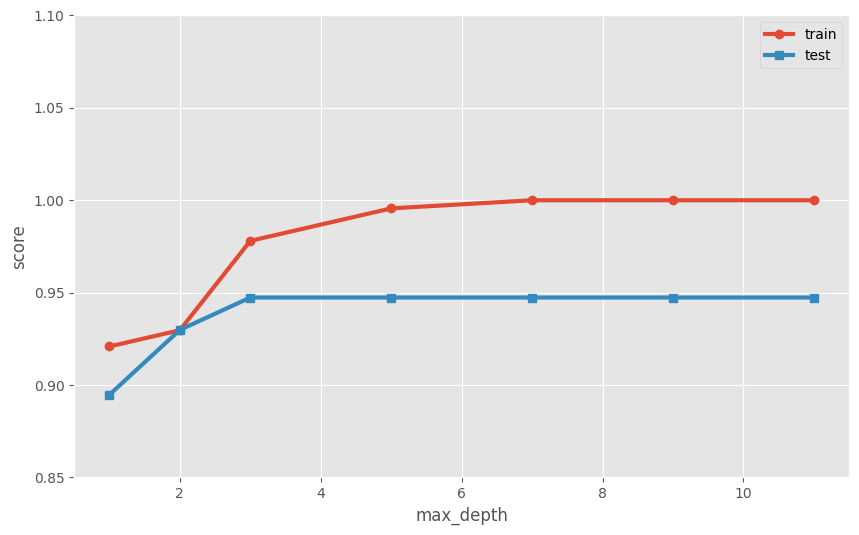

In [14]:
# Plotting the results - you don't need to change anything in this cell
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_score, 'o-', linewidth=3, label='train')
plt.plot(max_depths, test_score, 's-', linewidth=3, label='test')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.ylim(0.85, 1.1)
plt.legend()

Lets perform this experiment again, this time changing the 'min_samples_leaf' property. For each iteration in the for loop create a new decision tree and set the 'min_samples_leaf' property to the corresponding depth. MAKE SURE TO SET THE RANDOM SEED TO 42. Append the training data accuracy score and testing data accuracy score to the corresponding arrays for each iteration. Once you have completed this step you can run the next cell and the graph will show the the accuracy of the learner whith different 'min_samples_leaf'. Please write a comment explaining what you think the best value for 'min_samples_leaf'' is and why the training/testing performance changes based on the value of 'min_samples_leaf'. Use terms like 'bias' and 'variance' to support your choice.

In [15]:
train_score = []
test_score = []
min_samples = np.array([2, 4, 8, 16, 32])
for s in min_samples:
    # Write your code here
    tree = DecisionTreeClassifier(random_state=42, min_samples_leaf=s)
    tree.fit(X_train, y_train)
    testscore = tree.score(X_test, y_test)
    test_score.append(testscore)
    trainscore = tree.score(X_train, y_train)
    train_score.append(trainscore)

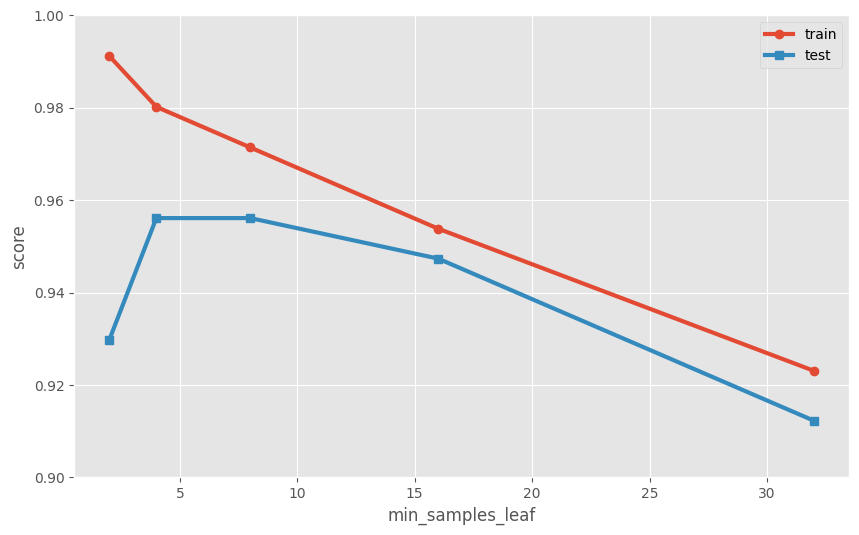

In [16]:
# Plotting the results - you don't need to change anything in this cell
plt.figure(figsize=(10, 6))
plt.plot(min_samples, train_score, 'o-', linewidth=3, label='train')
plt.plot(min_samples, test_score, 's-', linewidth=3, label='test')
plt.xlabel('min_samples_leaf')
plt.ylabel('score')
plt.ylim(0.9, 1)
plt.legend()

# I would use min_sample_leaf of 15- Although it has a higher bias, it has a low variance
# and the accuracy is still almost 96, whcih is considered to be a good score. 